In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [47]:
df = pd.read_csv('USArrests.csv', index_col = 0)

In [48]:
df.head(3)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


In [49]:
df.shape

(50, 4)

In [50]:
# 1973 yili, per 100.000 suclar. UrbanPop % olarak.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [52]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Hopkins Test**

In [53]:
from pyclustertend import hopkins
from sklearn.preprocessing import scale

In [54]:
hopkins(df, df.shape[0])  # dogrudan 50 de yazilabilir

0.45389977120587305

In [55]:
hopkins(scale(df), df.shape[0]) # scale etmek gelistirdi

0.388546072056608

KMeans

In [56]:
k_means = KMeans(n_clusters = 2).fit(df)  # scale edilmemis haliyle devam

In [57]:
clusters = k_means.labels_

In [58]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

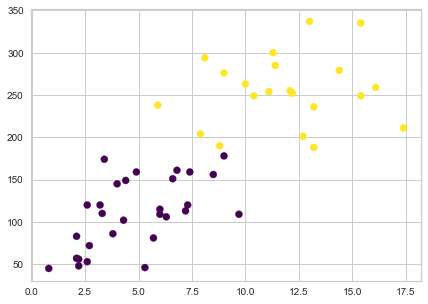

In [59]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis");

In [60]:
centroids = k_means.cluster_centers_

In [61]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

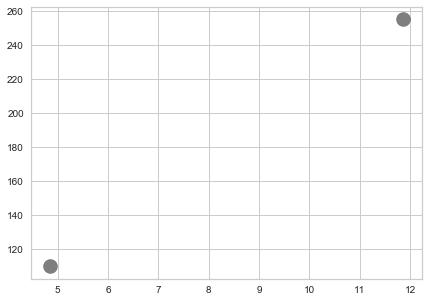

In [62]:
plt.scatter(centroids[:,0], centroids[:,1], c = "black", s = 200, alpha=0.5);

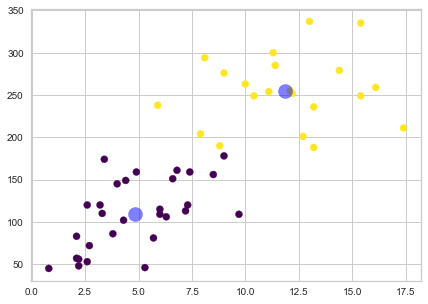

In [63]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(centroids[:,0], centroids[:,1], c = "blue", s = 200, alpha=0.5);

**Elbow Method**

In [64]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)

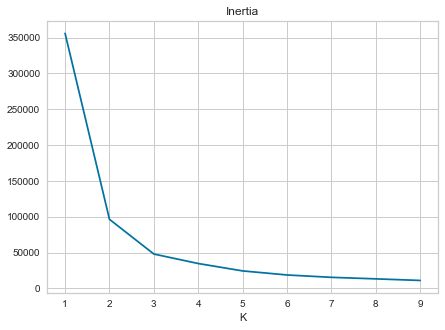

In [65]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.title("Inertia");

In [66]:
ssd

[355807.8215999999,
 96399.02814449917,
 47964.26535714286,
 34728.62935714286,
 24417.023523809527,
 18768.000666666667,
 15463.473777777777,
 13329.361976190476,
 11125.033809523811]

In [67]:
from yellowbrick.cluster import KElbowVisualizer

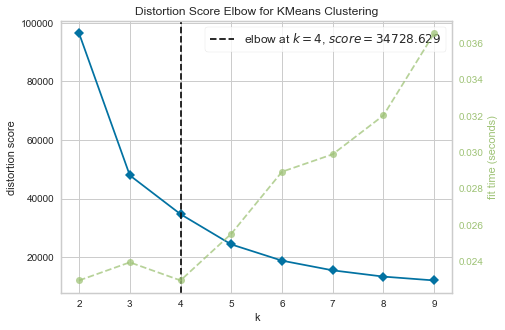

In [68]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df)
visu.poof()

In [69]:
kmeans = KMeans(n_clusters = 4).fit(df)

In [70]:
labels = kmeans.labels_

In [71]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [72]:
df['cluster_id'] = labels

In [73]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,0


**Silhoutte Score**

In [74]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [75]:
print(f'Silhouette Score(n=4): {silhouette_score(df, labels)}')

Silhouette Score(n=4): 0.5015423616434047


In [76]:
# silhoutte score 1'e yakinsa, kumeler birbirnden ayrilmis ve belirgin olur.
# also, cluster uyumunun da olcutudur - cluster ici elemanlar birbirine yakin, diger cluster elemanlarindan da uzaktirlar
# sil-score veriye atanir - veri noktalari birbirine ne kadar yakin ve diger cluster elemanlarina ne kadar uzak inceler

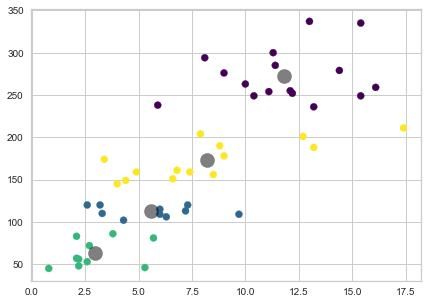

In [77]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

In [78]:
from mpl_toolkits.mplot3d import Axes3D

In [79]:
kmeans= KMeans(n_clusters=3).fit(df)
clusters= kmeans.labels_
centers = kmeans.cluster_centers_

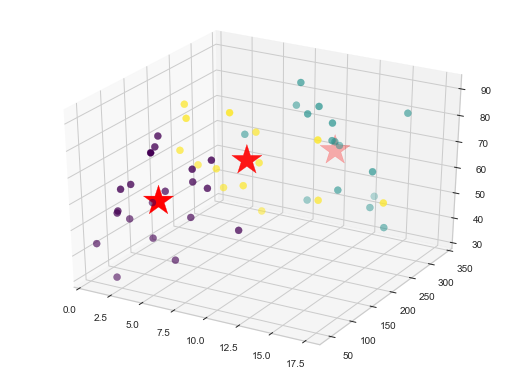

In [80]:
plt.rcParams["figure.figsize"] =(7,5)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2],c = clusters, s = 50,cmap = "viridis")
ax.scatter(centers[:,0],centers[:,1],centers[:,2],c="red",marker="*",s = 1000);

**ARI Score**

In [36]:
# external score - bunun icin domain bilgisi gerekiyor

In [81]:
new_df = df.sample(15)
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id
North Carolina,13.0,337,45,16.1,0
Oregon,4.9,159,67,29.3,3
Alabama,13.2,236,58,21.2,0
Rhode Island,3.4,174,87,8.3,3
Missouri,9.0,178,70,28.2,3
Massachusetts,4.4,149,85,16.3,3
Michigan,12.1,255,74,35.1,0
Texas,12.7,201,80,25.5,3
Ohio,7.3,120,75,21.4,1
South Dakota,3.8,86,45,12.8,2


In [82]:
new_df['true_label'] = [0, 1, 0, 0, 2, 3, 1, 0, 1, 0, 0, 2, 3, 1, 2]

In [83]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_label
North Carolina,13.0,337,45,16.1,0,0
Oregon,4.9,159,67,29.3,3,1
Alabama,13.2,236,58,21.2,0,0
Rhode Island,3.4,174,87,8.3,3,0
Missouri,9.0,178,70,28.2,3,2
Massachusetts,4.4,149,85,16.3,3,3
Michigan,12.1,255,74,35.1,0,1
Texas,12.7,201,80,25.5,3,0
Ohio,7.3,120,75,21.4,1,1
South Dakota,3.8,86,45,12.8,2,0


In [84]:
from sklearn.metrics.cluster import adjusted_rand_score

In [85]:
adjusted_rand_score(new_df['true_label'], new_df['cluster_id'])

-0.06697459584295613

In [86]:
#  ARI -1 ile 1 arasi degisir. 1'e yaklasmasi iyidir.

In [87]:
# daha az hatali bir sutun yazalim
new_df['true_label'] = [0, 1, 0, 0, 2, 3, 1, 0, 1, 0, 2, 0, 1, 0, 2]

In [88]:
adjusted_rand_score(new_df['true_label'], new_df['cluster_id'])

-0.039603960396039625

In [45]:
# Rand Score RI = (number of agreeing pairs) / (number of pairs)
# Adjusted RI = ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

**Hiearchical Thoery**

In [89]:
from scipy.cluster.hierarchy import linkage

In [90]:
hc_complete = linkage(df, 'complete')
hc_ward = linkage(df, 'ward')

In [91]:
from scipy.cluster.hierarchy import dendrogram

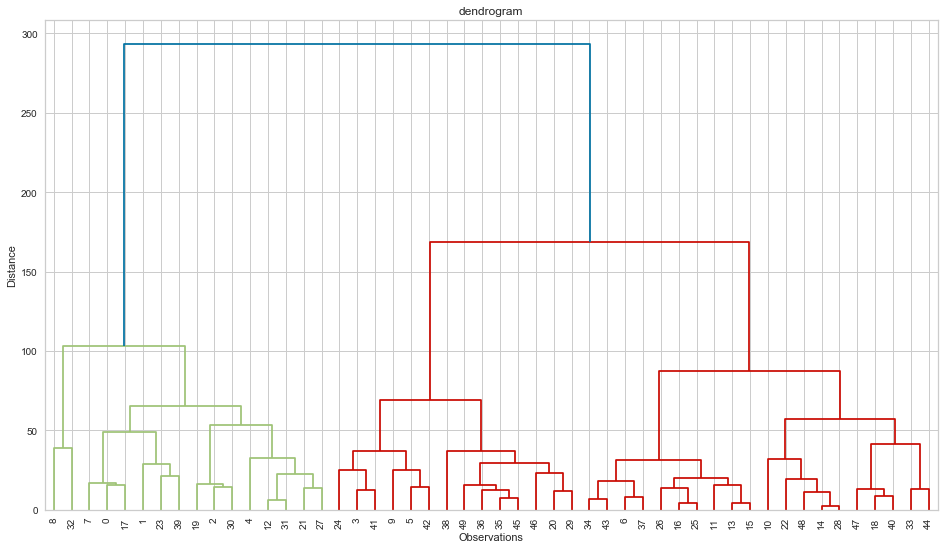

In [93]:
plt.figure(figsize = (16,9))
plt.title('dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_complete, leaf_font_size = 10);

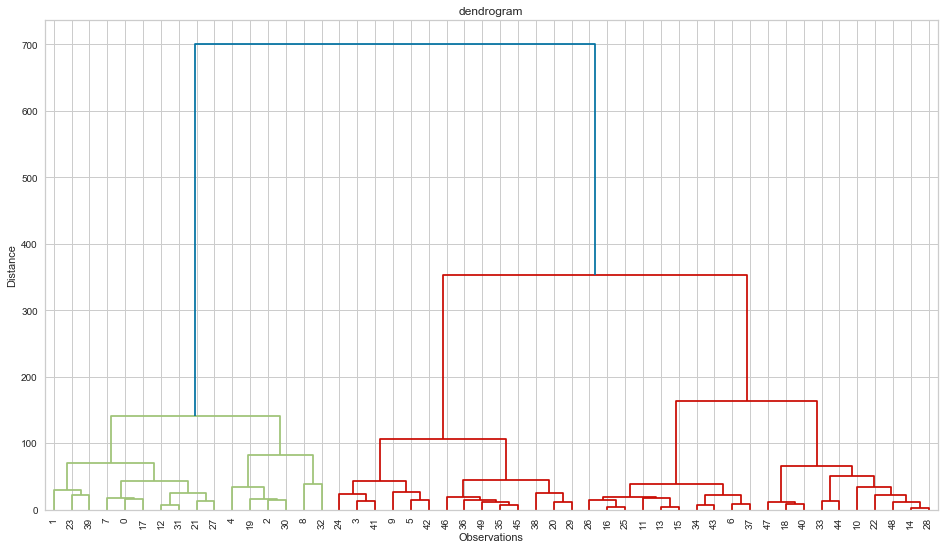

In [94]:
plt.figure(figsize = (16,9))
plt.title('dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hc_ward, leaf_font_size = 10);

In [95]:
from sklearn.cluster import AgglomerativeClustering

In [113]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') # linkage default ward
cluster.fit_predict(df)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [114]:
print(cluster.labels_) # prediction sonucu cikan label'lar

[1 1 1 2 1 2 0 1 1 2 0 0 1 0 0 0 0 1 0 1 2 1 0 1 2 0 0 1 0 2 1 1 1 0 0 2 2
 0 2 1 0 2 2 0 0 2 2 0 0 2]


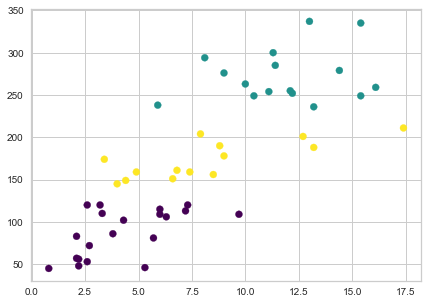

In [115]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster.labels_, cmap = 'viridis');

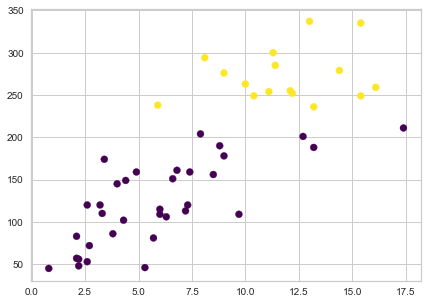

In [117]:
# 2 clusters icin
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward') # linkage default ward
cluster.fit_predict(df)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=cluster.labels_, cmap = 'viridis');

Silhoutte Score

In [107]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [108]:
print(f'Silhouette Score(n=3): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=3): 0.5321168134333842


In [112]:
print(f'Silhouette Score(n=2): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=2): 0.5763414554575738


In [118]:
# silhouette_score, öncelikle 1 e yakın olması lazım, 1 se oldukça birbirinden uzak.
# Aynı zamanda kümeler içindeki uyumdan da bilgi veriyor.
# 2 tip değerlendirmesi var;
# 1. ölçüt 1 veri noktasının diğer sample lara ne kadar yakın olduğunu bulması 1 ölçüt,
# 2. ölçüt diğer kümelere olan uzaklığı